# FRC Match Metrics
Displays the results of a FRC match in a series of charts

## Setup

In [1]:
# In your venv, install pandas and matplotlib: 
#  pip install pandas matplotlib
# If you are using VS Code, it should ask you to install the IPython extensions.
# If this cell runs with no errors, you should be all set.
import util
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
EVENT_KEY = '2024wimi'
TEAM = 'frc6223'

url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/simple'
resp = util.call_tba_api(url).json()
event_name = str(resp['year']) + ' ' + resp['name']

url = f'https://www.thebluealliance.com/api/v3/team/{TEAM}'
team_name = util.call_tba_api(url).json()['nickname']

print(team_name, 'at', event_name)

Arsenal of Engineering at 2024 Wisconsin Regional


## Call API

In [95]:
# Get calculated rankings
url = f'https://www.thebluealliance.com/api/v3/event/{EVENT_KEY}/oprs'
response = util.call_tba_api(url).json()

df_opr = pd.DataFrame.from_dict(response['oprs'], orient='index', columns=['opr'])
df_dpr = pd.DataFrame.from_dict(response['dprs'], orient='index', columns=['dpr'])
df_ccwm = pd.DataFrame.from_dict(response['ccwms'], orient='index', columns=['ccwm'])

In [96]:
# Create a chart given a dataframe and other info
def print_chart(df, col, title):
    # First, sort by the column we are interested in
    df = df.sort_values(by=col, ascending=False)

    # Get the figure and axis variables so we can configure it
    fig, ax = plt.subplots()

    # Create a horizontal bar chart with the data
    hbars = ax.barh(df.index, df[col], align='center')

    # Highlight the team we are interested in
    i = df.index.get_loc(TEAM)
    hbars[i].set_color('r')

    # Turn off the labels - too noisy
    ax.get_yaxis().set_visible(False)

    # Make it descending - maybe pass this in...
    ax.invert_yaxis()

    ax.set_title('#' + str(TEAM).replace('frc','') + ' ' + team_name+ ' ' +'at'+ ' ' + event_name + '\n' + title)
    plt.show()

    print(df[:10])


## Print Charts

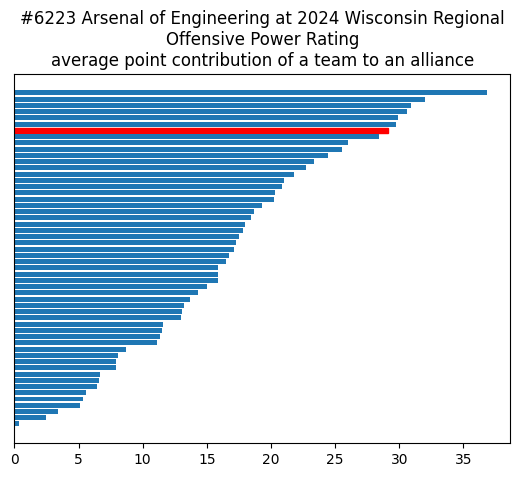

               opr
frc1714  36.816284
frc1732  32.029102
frc1781  30.920013
frc2194  30.601834
frc3630  29.880589
frc9535  29.755144
frc6223  29.100187
frc8744  28.398148
frc93    25.973682
frc930   25.543970


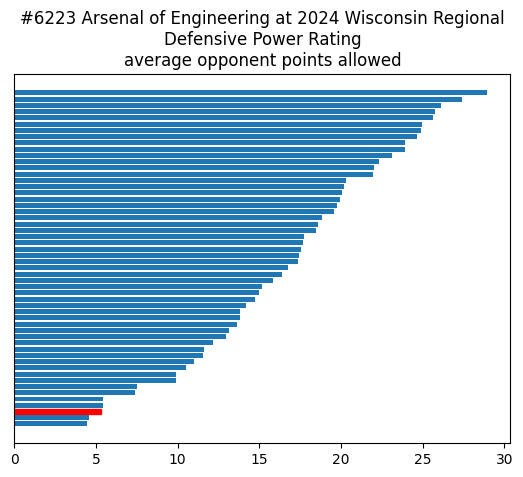

               dpr
frc8802  28.916487
frc537   27.413548
frc1259  26.117114
frc3692  25.719310
frc4645  25.633149
frc8029  24.963816
frc8531  24.908634
frc4787  24.660193
frc5096  23.918159
frc6381  23.886740


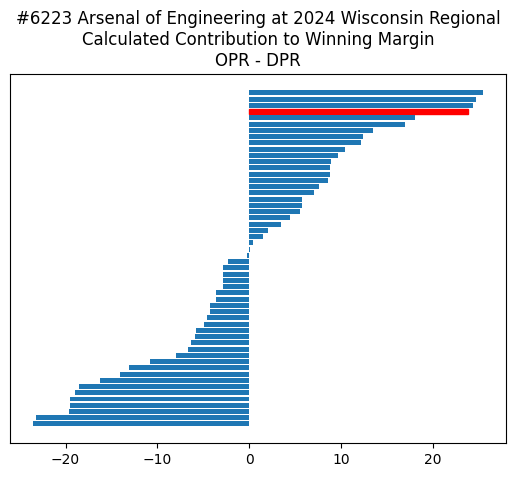

              ccwm
frc1781  25.468068
frc1714  24.631793
frc9535  24.340653
frc6223  23.777958
frc930   18.026889
frc3630  16.899066
frc8744  13.432261
frc93    12.352932
frc2194  12.139842
frc4786  10.428843


In [98]:
print_chart(df_opr, 'opr', 'Offensive Power Rating\naverage point contribution of a team to an alliance')
print_chart(df_dpr, 'dpr', 'Defensive Power Rating\naverage opponent points allowed')
print_chart(df_ccwm, 'ccwm', 'Calculated Contribution to Winning Margin\nOPR - DPR')